### Описание проекта, загрузка данных.

#### Введение
______
**Название проекта**  

Исследование объявлений о продаже квартир сервиса Яндекс Недвижимость
_____

**Цель исследования**  

Проведение исследовательского анализа данных и выявление параметров, влияющих на цену объектов
_______
**Задачи исследования**

- Провести необходимую предобработку данных
- Сформировать и дополнить датасет новыми столбцами с требуемыми параметрами
- Провести исследовательский анализ данных, при этом:
    - обработать аномалии в столбцах
    - изучить, как быстро продавались квартиры
    - определить факторы, которые больше всего влияют на общую стоимость объекта
    - рассчитать среднюю цену 1 кв.м в 10 населённых пунктах с наибольшим числом объявлений
    - построить график изменения средней цены для каждого километра от центра Петербурга.
    
_____
**Исходные данные**  

Имеются данные, представленные в виде одного датасета, содержащего следующую информацию:

- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `balcony` — число балконов
- `ceiling_height` — высота потолков (м)
- `cityCenters_nearest` — расстояние до центра города (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
- `first_day_exposition` — дата публикации
- `floor` — этаж
- `floors_total` — всего этажей в доме
- `is_apartment` — апартаменты (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `last_price` — цена на момент снятия с публикации
- `living_area` — жилая площадь в квадратных метрах (м²)
- `locality_name` — название населённого пункта
- `open_plan` — свободная планировка (булев тип)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `rooms` — число комнат
- `studio` — квартира-студия (булев тип)
- `total_area` — общая площадь квартиры в квадратных метрах (м²)
- `total_images` — число фотографий квартиры в объявлении

#### Загрузка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv')

#### Общая информация о датасете 

In [2]:
pd.set_option('display.max_columns', None)
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Зафиксируем начальное количество данных в переменную `shape_start`

In [4]:
shape_start = data.shape
shape_start

(23699, 22)

#### Гистограммы для всех числовых столбцов таблицы

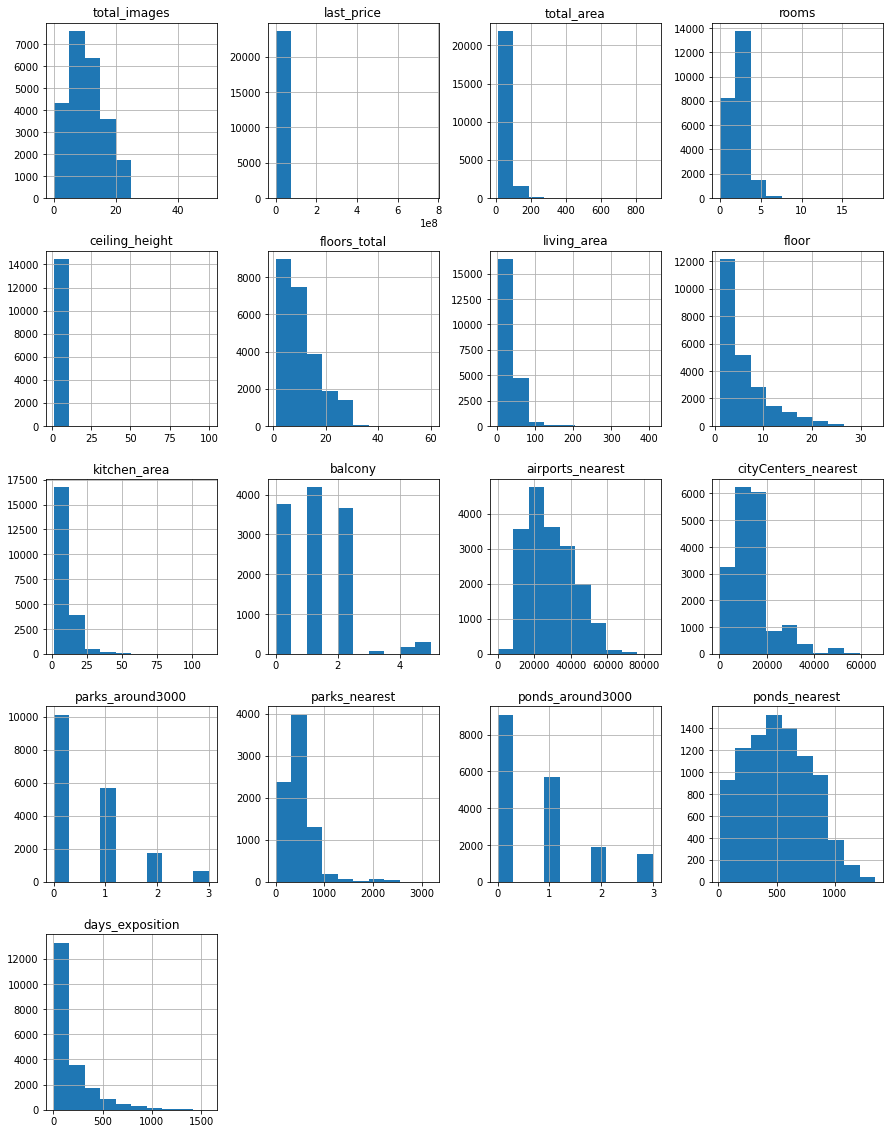

In [5]:
data.hist(figsize=(15, 20))
plt.show()

In [6]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


#### Вывод: на гистограммах по многим численным параметрам видно их резкое смещение "влево" с пустотами в правой части, это означает, что имеется определенное количество аномальных значений по этим параметрам, которые значительно превышают значения  в основном объеме соответствующих данных. Это также подтверждается значениями максимумов из таблици с описанием данных. Отрицательные значения отстутствуют. Работа с аномальными значениями будет произведена на следующих этапах обработки данных.

<div class="alert alert-success">

**✔️ Комментарий ревьюера ✔️**
   
   Хорошо. Приступим к предобработке

</div>


### Предобработка данных

#### Удаление пропусков. 

Выведем количество пропущенных значений для каждого столбца

In [7]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

**Заменим пропуски в числе балконов на 0, предположив, что раз продавец не указал число балконов, то, скорее всего, в его квартире их нет.**

In [8]:
data['balcony'] = data['balcony'].fillna(0)

In [9]:
data = data.dropna(subset=['locality_name'])

По пропущенным параметрам: ceiling_height, living_area, is_apartment, kitchen_area, days_exposition - логичную замену предположить невозможно, поэтому оставляем здесь пропуски.
Возможные причины: человеческий фактор либо техническая ошибка.

Причинами пропуска в данных, которые получены автоматически из геосервисов, могут быть также техническая ошибка либо невозможность их определения автоматически по причине некорректного ввода адреса объекта продавцом. К пропускам в этих данных: airports_nearest,	cityCenters_nearest,	parks_around3000,	parks_nearest,	ponds_around3000,	ponds_nearest вернемся позже, после обработки пропусков в данных о названии населенного пункта.

#### Изменение типов данных

##### Приведем к корректным типам даным значения столбцов "дата публикации" - формат дата и "количество балконов" - целочисленный тип

In [10]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S' )

In [11]:
data['balcony'] = data['balcony'].astype(int)

Тип столбцов "всего этажей в доме", "количество дней экспозиции" и "апартаменты" не удается заменить на целочисленные типы и булев тип соответственно по причине наличия в них пропусков.

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  float64       
 2   total_area            23650 non-null  float64       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        14490 non-null  float64       
 6   floors_total          23565 non-null  float64       
 7   living_area           21752 non-null  float64       
 8   floor                 23650 non-null  int64         
 9   is_apartment          2760 non-null   object        
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          21381 non-null  float64       
 13  balcony         

#### Обработка неявных дубликатов

In [13]:
sorted(data['locality_name'].unique())

['Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалёво',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'городской поселок Большая Ижора',
 'городской поселок Янино-1',
 'городской посёлок Будогощь',
 'городской посёлок Виллози',
 'городской посёлок Лесогорский',
 'городской посёлок Мга',
 'городской посёлок Назия',
 'городской посёлок Новоселье',
 'городской посёлок Павлово',
 'городской посёлок Рощино',
 'городской посёлок Свирьстрой',
 'городской посёлок Советский',
 'городской посёлок Фёдоровское',
 'городск

In [14]:
print(len(data['locality_name'].value_counts()))

364


##### Из списка названий населенных видно, что встречаются одинаковые названия, в т.ч. с разницей в написании через 'ё' или 'е', произведем необходимые замены

In [15]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')

In [16]:
name_list = ['городской поселок Большая Ижора', 'деревня Гарболово', 'коттеджный поселок Лесное', 'деревня Зимитицы',\
             'деревня Калитино', 'деревня Кудрово', 'городской поселок Лесогорский', 'городской поселок Мга',\
             'поселок Мурино', 'городской поселок Назия', 'село Никольское',['село Павлово', 'городской поселок Павлово'],\
             'поселок при железнодорожной станции Приветнинское', 'садовое товарищество Приладожский',\
             'деревня Рабитицы', 'садовое товарищество Рахья', 'городской поселок Рощино', 'поселок Рябово',\
             'городской поселок Советский', 'деревня Федоровское']
rep_list = ['поселок городского типа Большая Ижора', 'поселок Гарболово', 'поселок Лесное', 'поселок Зимитицы',\
            'поселок Калитино', 'Кудрово', 'поселок городского типа Лесогорский', 'поселок городского типа Мга',\
            'Мурино', 'поселок городского типа Назия', 'Никольское', 'поселок городского типа Павлово', \
            'поселок станции Приветнинское', 'поселок городского типа Приладожский', 'поселок Рабитицы', \
            'поселок городского типа Рахья', 'поселок городского типа Рощино', 'поселок городского типа Рябово',\
            'поселок городского типа Советский', 'городской поселок Федоровское']
for old_name, rep_name in zip(name_list, rep_list):
    data['locality_name'] = data['locality_name'].replace(old_name, rep_name)

In [17]:
print(len(data['locality_name'].value_counts()))

309


Также было проверено влияние прописных и строчных букв в названии населенного пункта, разного написания не выявлено.

##### Проверим на наличие явных строк-дубликатов в данных

In [18]:
data.duplicated().sum()

0

### Добавление в таблицу новых столбцов для последующего анализа

#### Добавим столбец с ценой одного квадратного метра

In [19]:
data['price_1m2'] = round((data['last_price'] / data['total_area']),2)

#### Добавим столбцы с данными о датах: 
- день недели публикации объявления (0 — понедельник, 1 — вторник и так далее)
- месяц публикации объявления
- год публикации объявления

In [20]:
data['day_week_posting'] = data['first_day_exposition'].dt.weekday
data['month_posting'] = data['first_day_exposition'].dt.month
data['year_posting'] = data['first_day_exposition'].dt.year

#### Добавим столбец с типом этажа квартиры (значения — «первый», «последний», «другой»)

In [21]:
# Создадим функцию для категоризации квартир
def type_floor(row):
    try:
        if row['floor'] == 1:
            return 'первый'
        elif row['floor'] == row['floors_total']:
            return 'последний'
        elif (row['floor'] > 1) & (row['floor'] < row['floors_total']):
            return 'другой'
        else:
            return 'нет данных'
    except:
        return 'ошибка при определении категории'

In [22]:
data['type_floor'] = data.apply(type_floor, axis=1)

#### Добавим столбец с расстоянием до центра города в километрах

In [23]:
data['cityCenters_km'] = round(data['cityCenters_nearest'] / 1000)

Отобразим часть итогового датасета

In [24]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_1m2,day_week_posting,month_posting,year_posting,type_floor,cityCenters_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.37,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.79,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой,14.0
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.10,4,7,2015,другой,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другой,8.0


### Исследовательский анализ данных

#### Анализ общей площади

In [25]:
data['total_area'].describe()

count    23650.000000
mean        60.329069
std         35.661808
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

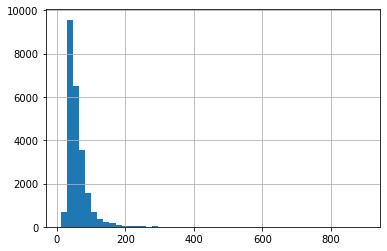

In [26]:
data['total_area'].hist(bins=50)
plt.show()

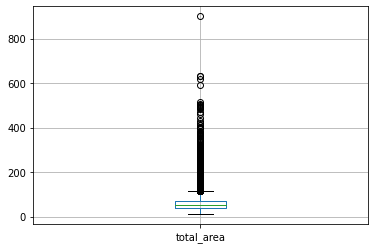

In [27]:
data.boxplot('total_area')
plt.show()

Из диаграмм видно, что значение общей площади объекта - 900м2 является выбросом и его можно исключить из анализа

In [28]:
data = data[data['total_area'] != 900]

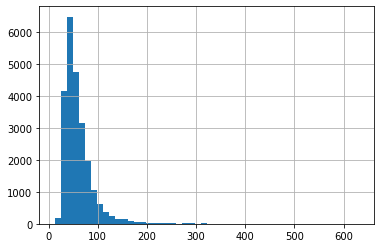

In [29]:
data['total_area'].hist(bins=50)
plt.show()

Рассмотрим минимальные общие площади объектов

In [30]:
data[['last_price', 'total_area', 'price_1m2', 'locality_name', 'cityCenters_km', 'is_apartment', 'year_posting']]\
    .sort_values(by='total_area').head(10)

,last_price,total_area,price_1m2,locality_name,cityCenters_km,is_apartment,year_posting
19904,2400000.0,12.0,200000.00,Санкт-Петербург,1.0,NaN,2017
19807,3800000.0,13.0,292307.69,Санкт-Петербург,1.0,NaN,2018
17961,1400000.0,13.0,107692.31,Санкт-Петербург,16.0,NaN,2017
19546,1850000.0,13.0,142307.69,Санкт-Петербург,5.0,False,2019
19558,1686000.0,13.2,127727.27,Санкт-Петербург,4.0,NaN,2018
19642,1190000.0,14.0,85000.00,Санкт-Петербург,11.0,NaN,2018
16949,1550000.0,15.0,103333.33,Санкт-Петербург,16.0,NaN,2018
12040,1900000.0,15.0,126666.67,Сосновый Бор,NaN,NaN,2018
8886,2450000.0,15.5,158064.52,Санкт-Петербург,5.0,NaN,2018
9412,2100000.0,16.0,131250.00,Санкт-Петербург,2.0,NaN,2017


Анализ минимальной общей площади объекта показал, что здесь явных выбросов нет, основная масса находится в Санкт-Петербурге, соотношение площади - цены за кв.м - расположения у центра адекватное, оставляем как есть

#### Анализ жилой площади

In [31]:
data['living_area'].describe()

count    21751.000000
mean        34.431103
std         21.890785
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.000000
Name: living_area, dtype: float64

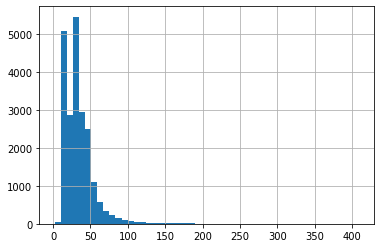

In [32]:
data['living_area'].hist(bins=50)
plt.show()

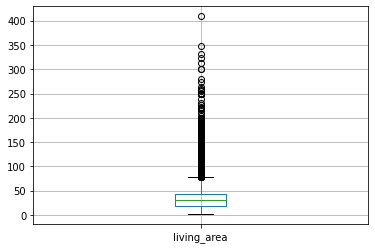

In [33]:
data.boxplot('living_area')
plt.show()

Сделаем проверку на отсутствие квартир с жилой площадью, превышающей общую площадь

In [34]:
len(data[data['living_area'] > data['total_area']])

0

Из описания параметра и данных диаграмм видно наличие чрезмерно минимального значения жилой площади - 2 м2. В связи с тем, что жилая площадь имеет сильную зависимость от общей площади, посмотрим на наличие аномалий на диаграмме рассеивания  

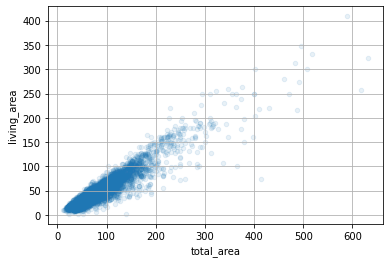

In [35]:
data.plot(x='total_area', y='living_area', kind='scatter',alpha=0.1, figsize=(6, 4), sharex=False, grid=True)
plt.show()

По соотношению максимальных значений жилой площади с общей аномалий не выявлено, обратим внимание на минимальные значения жилой площади 

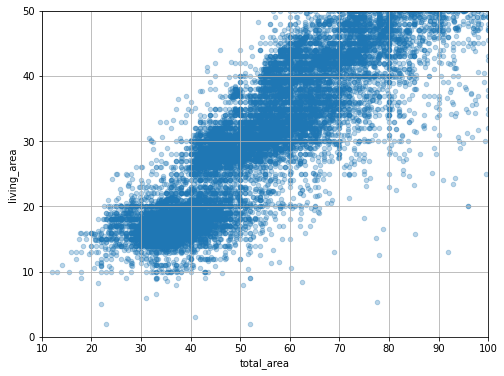

In [36]:
data.plot(x='total_area', y='living_area', kind='scatter', alpha=0.3, figsize=(8, 6), sharex=False, grid=True)
plt.xlim(10, 100)
plt.ylim(0, 50)
plt.show()

Из диаграммы рассеяния видим, что имеется определенный объем аномально низких значений жилой площади по отношению к общей, например, значения ниже 5 м2 при общей площади от 20 м2 и выше. По диаграмме разброса видим, что нижний коридор отношения жилой к общей площади проходит примерно в районе 25%. 

In [37]:
data[['total_area', 'living_area', 'locality_name', 'year_posting']]\
    .sort_values(by='living_area').head(10)

,total_area,living_area,locality_name,year_posting
13915,52.0,2.0,Санкт-Петербург,2018
21758,23.0,2.0,Мурино,2018
23574,139.0,3.0,Санкт-Петербург,2015
3242,41.0,3.0,Санкт-Петербург,2017
17582,22.0,5.0,Санкт-Петербург,2018
21943,77.6,5.4,Санкт-Петербург,2019
16431,31.0,6.0,Санкт-Петербург,2018
19251,33.0,6.5,Санкт-Петербург,2018
23208,37.0,8.0,Санкт-Петербург,2016
20994,50.6,8.0,Санкт-Петербург,2018


Рассмотрев первые минимальные значения жилой площади до 5 м2 и у которых отношение жилой/общей значительно ниже 25%, предлагается не заменять их значения, например, на 25% от жилой площади, чтобы не получить несуществующие квартиры с новыми параметрами, а исключить их из рассмотрения

Общее количество к исключению

In [38]:
len(data.query('living_area < 5.0'))

4

In [39]:
data = data.query('~(living_area >= 2.0 and living_area < 5.0)')

#### Анализ площади кухни

In [40]:
data['kitchen_area'].describe()

count    21377.000000
mean        10.561457
std          5.861258
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        107.000000
Name: kitchen_area, dtype: float64

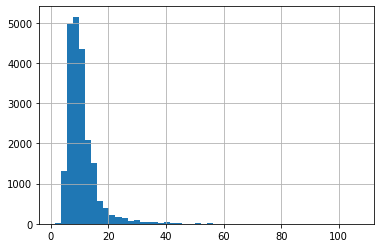

In [41]:
data['kitchen_area'].hist(bins=50)
plt.show()

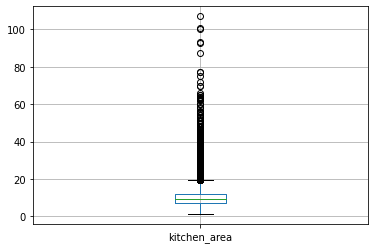

In [42]:
data.boxplot('kitchen_area')
plt.show()

Сделаем проверку на отсутствие квартир с площадью кухни, превышающей общую площадь

In [43]:
len(data[data['kitchen_area'] > data['total_area']])

0

В связи с тем, что площадь кухни имеет сильную зависимость от общей площади, посмотрим на наличие аномалий на диаграмме рассеивания  

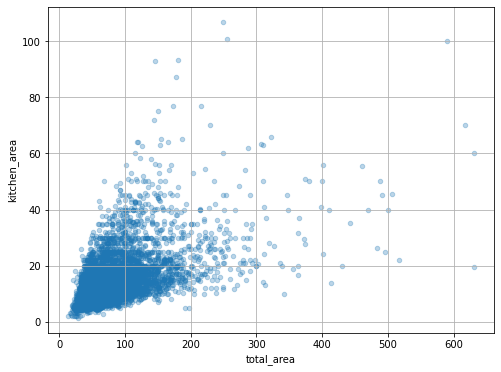

In [44]:
data.plot(x='total_area', y='kitchen_area', kind='scatter', alpha=0.3, figsize=(8, 6), sharex=False, grid=True)
plt.show()

Из диаграммы рассеяния видим, что:
- в диапазоне общей площади от 140 до 260 имееются очень большие кухни площадью от 80 до 110 м2, с учетом возможной перепланировки и объединения кухни с жилой площадью, оставим данные значения
- в диапазоне общей площади от 300 м2 и выше имееются очень маленькие кухни площадью ниже 20 м2, а также несколько значений площади кухонь ниже 10 м2 для квартир общей площадью около 170-200 м2. Исключим данные квартиры из дальнейшего анализа.

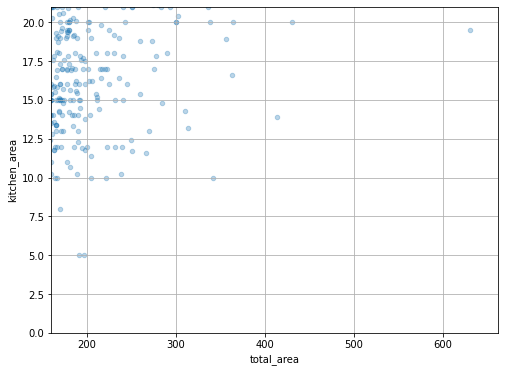

In [45]:
data.plot(x='total_area', y='kitchen_area', kind='scatter', alpha=0.3, figsize=(8, 6), sharex=False, grid=True)
plt.xlim(160,)
plt.ylim(0, 21)
plt.show()

In [46]:
data.query('total_area > 160 and kitchen_area < 10 or total_area > 300 and kitchen_area < 20')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_1m2,day_week_posting,month_posting,year_posting,type_floor,cityCenters_km
866,5,25000000.0,363.0,2017-12-23,14,3.16,5.0,222.0,4,NaN,False,False,16.6,0,Санкт-Петербург,38076.0,7950.0,0.0,NaN,2.0,435.0,418.0,68870.52,5,12,2017,другой,8.0
3365,13,22190000.0,197.0,2017-11-20,7,2.90,6.0,107.6,1,NaN,False,False,5.0,0,Санкт-Петербург,21583.0,1211.0,1.0,437.0,2.0,22.0,130.0,112639.59,0,11,2017,первый,1.0
3378,20,31000000.0,170.0,2018-05-14,4,3.00,9.0,112.0,2,NaN,False,False,8.0,1,Санкт-Петербург,26933.0,5780.0,1.0,625.0,1.0,283.0,112.0,182352.94,0,5,2018,другой,6.0
4435,13,22190000.0,191.2,2017-12-05,8,2.90,6.0,115.8,1,NaN,False,False,5.0,0,Санкт-Петербург,21589.0,1152.0,1.0,587.0,2.0,155.0,115.0,116056.49,1,12,2017,первый,1.0
9550,10,23500000.0,313.0,2017-02-13,9,3.20,6.0,179.2,5,NaN,False,False,13.2,0,Санкт-Петербург,38435.0,10138.0,1.0,146.0,0.0,NaN,NaN,75079.87,0,2,2017,другой,10.0
12859,20,140000000.0,631.2,2019-04-09,7,3.90,4.0,322.3,4,NaN,False,False,19.5,1,Санкт-Петербург,25707.0,4972.0,0.0,NaN,2.0,210.0,NaN,221799.75,1,4,2019,последний,5.0
13397,14,19500000.0,309.7,2016-02-03,9,NaN,5.0,199.0,5,NaN,False,False,14.3,0,Санкт-Петербург,10328.0,9987.0,2.0,352.0,0.0,NaN,468.0,62964.16,2,2,2016,последний,10.0
14991,19,45000000.0,413.5,2018-09-20,7,NaN,20.0,74.2,18,NaN,False,False,13.9,0,Санкт-Петербург,18748.0,4341.0,0.0,NaN,0.0,NaN,182.0,108827.09,3,9,2018,другой,4.0
15607,5,34000000.0,356.0,2017-09-12,7,3.55,7.0,248.5,5,NaN,False,False,18.9,0,Санкт-Петербург,24363.0,4931.0,3.0,173.0,0.0,NaN,20.0,95505.62,1,9,2017,другой,5.0
20820,7,73900000.0,342.0,2015-06-18,5,NaN,4.0,187.0,2,False,False,False,10.0,0,Санкт-Петербург,25079.0,5544.0,0.0,NaN,1.0,251.0,377.0,216081.87,3,6,2015,другой,6.0


Общее количество к исключению

In [47]:
len(data.query('total_area > 160 and kitchen_area < 10 or total_area > 300 and kitchen_area < 20'))

10

In [48]:
data = data.query('~(total_area > 160 and kitchen_area < 10) and ~(total_area > 300 and kitchen_area < 20)')

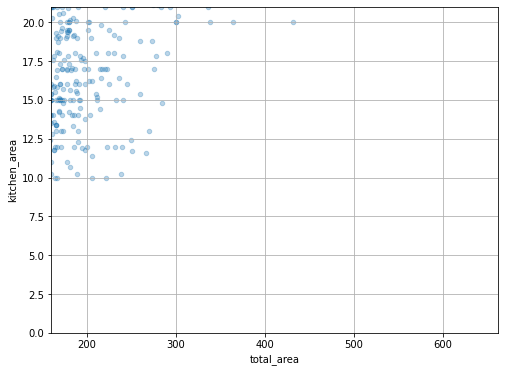

In [49]:
data.plot(x='total_area', y='kitchen_area', kind='scatter', alpha=0.3, figsize=(8, 6), sharex=False, grid=True)
plt.xlim(160,)
plt.ylim(0, 21)
plt.show()

Оценим минимальные значения площади кухни

In [50]:
data[['total_area', 'kitchen_area', 'locality_name','studio', 'year_posting']]\
    .sort_values(by='kitchen_area').head(15)

,total_area,kitchen_area,locality_name,studio,year_posting
20217,28.50,1.30,Санкт-Петербург,False,2019
19642,14.00,2.00,Санкт-Петербург,False,2018
6262,24.00,2.00,Санкт-Петербург,False,2018
16367,25.70,2.00,Санкт-Петербург,False,2017
11033,32.00,2.00,Санкт-Петербург,False,2016
9138,23.29,2.00,Санкт-Петербург,False,2018
906,27.00,2.00,Санкт-Петербург,False,2017
21419,20.00,2.00,Санкт-Петербург,False,2018
17834,34.70,2.30,Мурино,False,2017
8729,18.40,2.40,Пушкин,False,2018


Значения площади кухни ниже 3м2, считаем аномальным, с учетом того, что эти квартиры не являются студиями. Исключим  из дальнейшего анализа такие площади.

In [51]:
len(data.query('kitchen_area < 3.0'))

11

In [52]:
data = data.query('~(kitchen_area >= 1.3 and kitchen_area < 3.0)')

#### Анализ высоты потолков


In [53]:
data['ceiling_height'].describe()

count    14475.000000
mean         2.771051
std          1.262176
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

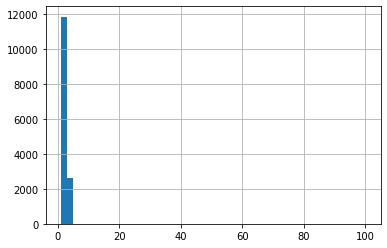

In [54]:
data['ceiling_height'].hist(bins=50)
plt.show()

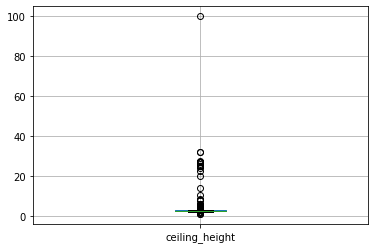

In [55]:
data.boxplot('ceiling_height')
plt.show()

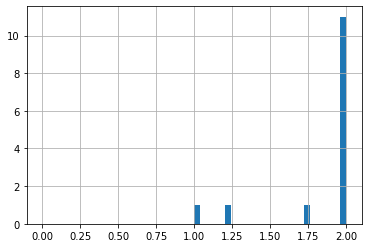

In [56]:
data['ceiling_height'].hist(bins=50, range=(0, 2))
plt.show()

##### Первый этап обработки потолков

In [57]:
# Удалим явные аномалии - потолки высотой до 2м и высотой 100м
# общее количество к исключению
len(data.query('ceiling_height < 2 or ceiling_height == 100'))

4

In [58]:
data = data.query('~(ceiling_height >0  and ceiling_height <2) and ceiling_height != 100')

##### Второй этап обработки потолков

In [59]:
data['ceiling_height'].max()

32.0

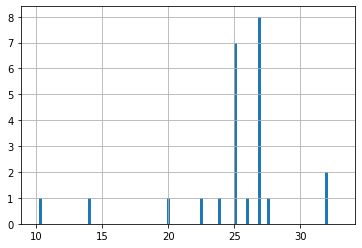

In [60]:
data['ceiling_height'].hist(bins=100, range=(10, 33))
plt.show()

Потолки выстой 20м и выше будем считать данными, занесенными некорректно, предполагая, что на самом деле это завышенные в 10 раз значения и реальная высота 2 м и выше, поэтому поделим их на 10 и сохраним в существующий столбец.

In [61]:
data.loc[(data['ceiling_height'] >= 20) & (data['ceiling_height'] <= 32), 'ceiling_height'] /= 10

Реальная высота потолков не может превышать 5 м, поэтому удалим такие записи

In [62]:
len(data.loc[(data['ceiling_height'] >= 5) & (data['ceiling_height'] < 15)])

14

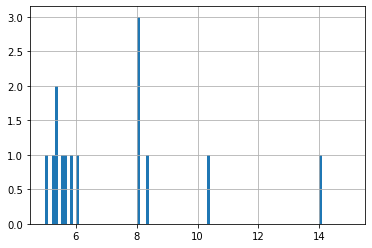

In [63]:
data['ceiling_height'].hist(bins=100, range=(5, 15))
plt.show()

In [64]:
data = data.query('~(ceiling_height >=5  and ceiling_height <15)')

#### Анализ типов этажа квартиры

In [65]:
data['type_floor'].describe()

count      23606
unique         4
top       другой
freq       17304
Name: type_floor, dtype: object

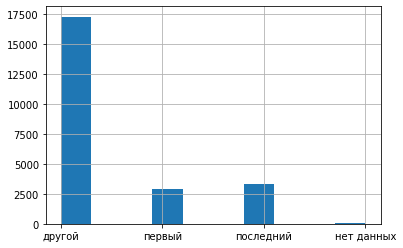

In [66]:
data['type_floor'].hist(bins=10)
plt.show()

In [67]:
data['type_floor'].value_counts()

другой        17304
последний      3316
первый         2904
нет данных       82
Name: type_floor, dtype: int64

В связи с тем, что доля квартир, по которым отсутствуют данные о типе этажа, составляет 3.5% и на следующем этапе анализа сложно будет извлечь полезную информацию их этих данных, исключим их из дальнейшего рассмотрения

In [68]:
data = data.query('~(type_floor == "нет данных")')

#### Анализ общего количества этажей в доме

In [69]:
data['floors_total'].describe()

count    23521.000000
mean        10.677012
std          6.592188
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

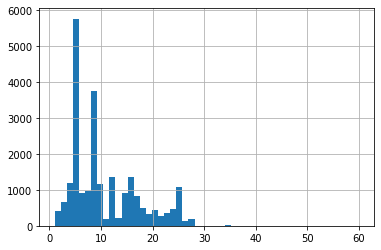

In [70]:
data['floors_total'].hist(bins=50)
plt.show()

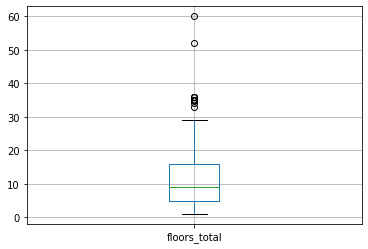

In [71]:
data.boxplot('floors_total')
plt.show()

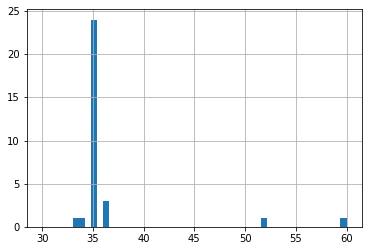

In [72]:
data['floors_total'].hist(bins=50, range=(30,60))
plt.show()

Рассмотрев количество домов разной этажности, примем решение оставить для дальнейшего рассмотрения дома в 35 этажей, т.к их количество 24 шт. достаточно для анализа, дома выше этажности из-за их редкости исключим из рассмотрения

In [73]:
len(data.loc[data['floors_total'] > 35])

5

In [74]:
data = data.query('~(floors_total > 35)')

#### Анализ расстояния до центра города (м)

In [75]:
data['cityCenters_nearest'].describe()

count    18023.000000
mean     14201.553848
std       8612.603608
min        181.000000
25%       9252.000000
50%      13107.000000
75%      16293.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

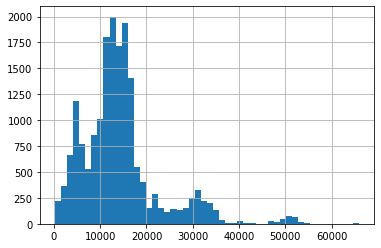

In [76]:
data['cityCenters_nearest'].hist(bins=50)
plt.show()

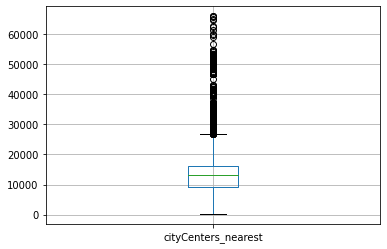

In [77]:
data.boxplot('cityCenters_nearest')
plt.show()

Самый крупный город в датасете - Санкт-Петербург, размер сечения его в самой широкой части по кольцевой дороге составляет порядка 30км, соответственно до центра 15км. С учетом распределения данных по гисторамме примем решение исключить их дальнейшего рассмотрения записи, где расстояние до центра превышает 38 000м. Выбранное расстояние позволит захватить и пригороды Санкт-Петрбурга, это же справедливо и для городов меньшего размера.

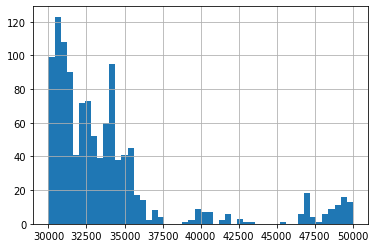

In [78]:
data['cityCenters_nearest'].hist(bins=50, range=(30000,50000))
plt.show()

In [79]:
len(data.loc[data['cityCenters_nearest'] > 38000])

310

In [80]:
data = data.query('~(cityCenters_nearest > 38000)')

#### Анализ расстояния до ближайшего парка (м)

In [81]:
data['parks_nearest'].describe()

count    7878.000000
mean      492.174537
std       341.080909
min         1.000000
25%       289.000000
50%       456.000000
75%       613.000000
max      3190.000000
Name: parks_nearest, dtype: float64

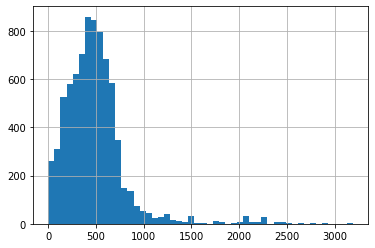

In [82]:
data['parks_nearest'].hist(bins=50)
plt.show()

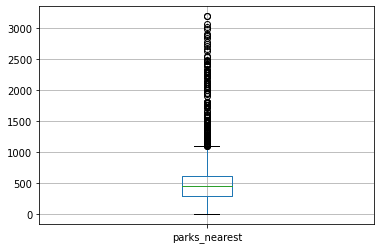

In [83]:
data.boxplot('parks_nearest')
plt.show()

Видно, что после 1500м количество объектов резко падает, рассмотрим подробнее этот диапазон

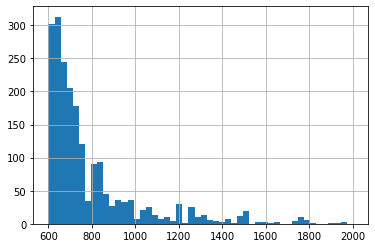

In [84]:
data['parks_nearest'].hist(bins=50, range=(600, 2000))
plt.show()

В связи с тем, что количество объектов с расстоянием до ближайшего парка свыше 1600м крайне мало, исключим их из рассмотрения 

In [85]:
len(data.loc[data['parks_nearest'] > 1600])

143

In [86]:
data = data.query('~(parks_nearest > 1600)')

In [87]:
data = data.reset_index(drop=True)

In [88]:
shape = data.shape
print(f'Доля текущего объема данных относительно первоначального составляет: {shape[0]/shape_start[0]:.1%}')

Доля текущего объема данных относительно первоначального составляет: 97.3%


#### Вывод по итогам первой части исследовательского анализа данных

Проанализировав данные, в том числе графически, там, где это представлялось возможным  заменили аномальные, редкие значения или исключили данные, где сложно было подобрать логическую замену. При исключении руководствовались принципом максимального сохранения данных, так, например, при анализе общей площади квартир были сохранены малочисленные данные по площадям свыше 200-300 м2, как представляющие интерес для исследования в рамках отдельной "люксовой" группы. По той же причине были сохранены соответствующие данные для жилой и площади кухни. Остальные данные "очищены" достаточно.

#### Изучение скорости продажи квартир

In [89]:
data['days_exposition'].describe()

count    19962.000000
mean       179.816852
std        218.508306
min          1.000000
25%         45.000000
50%         95.000000
75%        230.000000
max       1580.000000
Name: days_exposition, dtype: float64

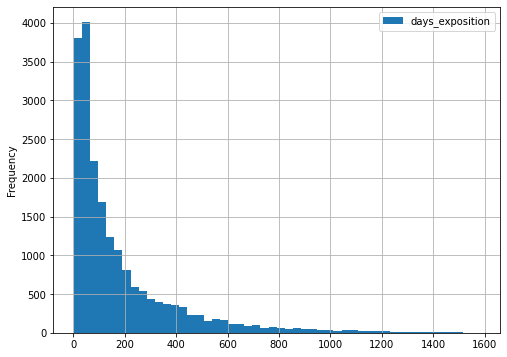

In [90]:
data.plot(y='days_exposition', kind='hist', bins=50, figsize=(8, 6), grid=True)
plt.show()

Рассчитаем среднее и медиану

In [91]:
(print('Количество дней экспозиции: среднее -', round(data['days_exposition'].mean(), 1), 
       'дн, медиана -', data['days_exposition'].median(),'дн'))

Количество дней экспозиции: среднее - 179.8 дн, медиана - 95.0 дн


Среднее значение экспозиции почти в 2 раза превышает медианное, это означает, что имеется незначительное количество значений, которые при этом резко отличаются от общей массы в большою сторону. Это также подтверждается гистораммой, где мы наблюдаем значения, в т.ч от 2-ух до 4-х лет экспозиции. 

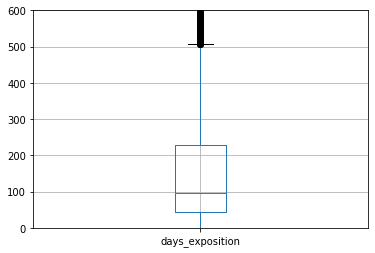

In [92]:
plt.ylim(0, 600)
data.boxplot('days_exposition')
plt.show()

Используя диаграмму размаха, можно сказать, что обычно продажа занимает около 100 дней, бОльшая часть продаж (75%) приходится на период до 230 дней. Продажи до трех месяцев можно считать быстрыми(лучше, чем в "среднем"), продажи свыше 500 дней (выходят за границы "нормальных" значений) можно классифицировать как долгие.

<AxesSubplot:>

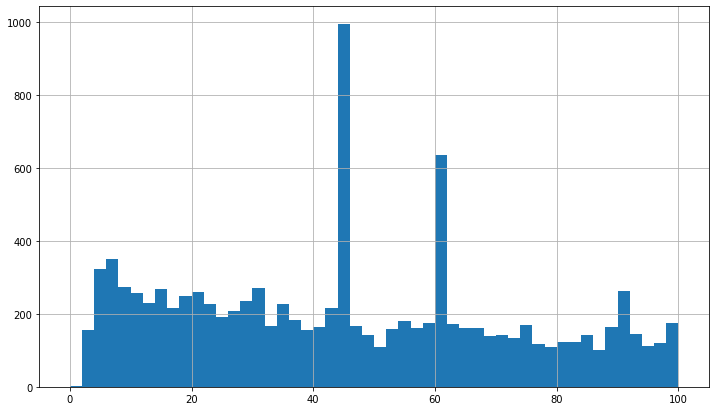

In [93]:
# Код ревьюера
data['days_exposition'].hist(bins=50, range=(0,100), figsize=(12, 7))

#### Изучение факторов, влияющих на общую (полную) стоимость объекта

##### Изучение влияния общей площади на общую (полную) стоимость объекта

Построим график зависимости стоимости объекта от общей площади представленных квартир

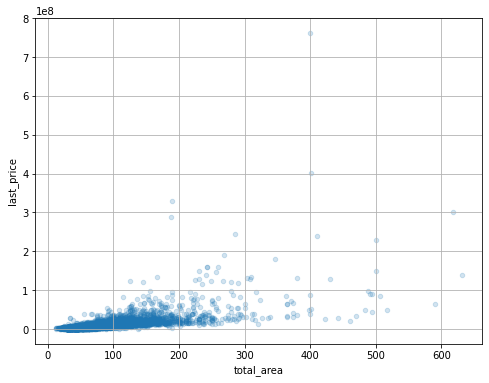

In [94]:
data.plot(x='total_area', y='last_price', kind='scatter', alpha=0.2, figsize=(8, 6), grid=True)
plt.show()


Видим, что с увеличением общей площади разброс стоимости растет, при этом на небольших площадях уже прослеживается положительная зависимость стоимости от общей площади объекта.

Рассмотрим график в районе основных объемов общих площадей, увеличив масштаб

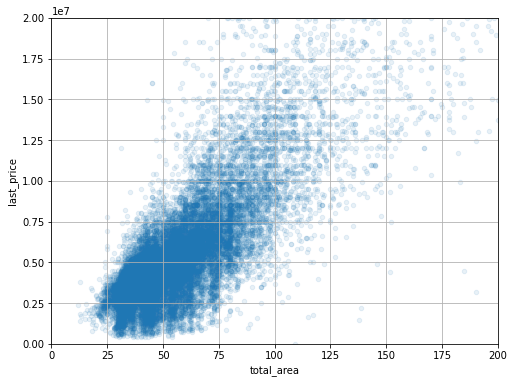

In [95]:
(data.plot(x='total_area', y='last_price', kind='scatter', alpha=0.1, figsize=(8, 6), grid=True,
            xlim=(0, 200), ylim=(0, 20_000_000)))
plt.show()


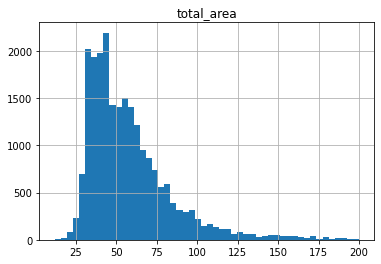

In [96]:
data.query('total_area <= 200').hist('total_area', bins=50)
plt.show()

Для уменьшения разброса стоимости объектов проведем анализ сгруппировав общие площади с расчетом по этим группам медианных значений стоимости. 

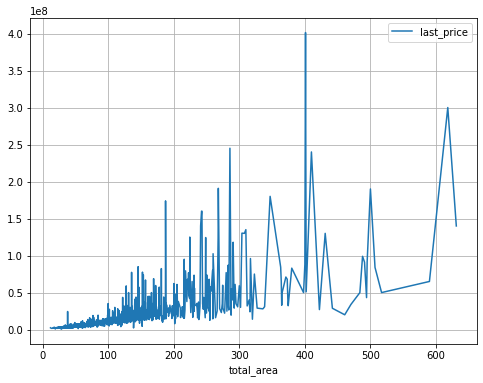

In [97]:
# Общий график
(data.pivot_table(index='total_area', values='last_price', aggfunc='median')
     .plot(y='last_price', figsize=(8, 6), grid=True))
plt.show()

In [98]:
data_area = (data.pivot_table(index='total_area', values='last_price', aggfunc='median')
                    .reset_index())
print('Коэффициент корреляции:', round(data_area['total_area'].corr(data_area['last_price']),2))

Коэффициент корреляции: 0.71


Разброс цен уменьшился, стала гораздо лучше видна положительная зависимость стоимости объекта от общей площади, особенно на небольших площадях, что также подверждается положительным коэффициентом корреляции.

Из графиков и гистограммы видно, что основной объем общих площадей располагается в диапазоне до 125 м2, построим отдельно графики для объемов площадей до 125 м2 и свыше с расчетом коэффициентов корреляции по каждой такой выборке. 

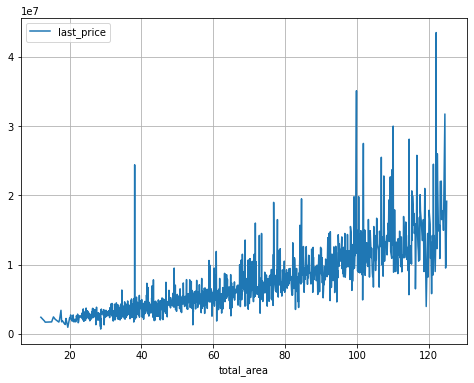

In [99]:
# График для общих площадей до 125м2
(data.query('total_area <= 125')
     .pivot_table(index='total_area', values='last_price', aggfunc='median')
     .plot(y='last_price', figsize=(8, 6), grid=True))
plt.show()

In [100]:
data_area_usual = (data.query('total_area <= 125')
                         .pivot_table(index='total_area', values='last_price', aggfunc='median')
                            .reset_index())
print('Коэффициент корреляции:', round(data_area_usual['total_area'].corr(data_area_usual['last_price']),2))

Коэффициент корреляции: 0.83


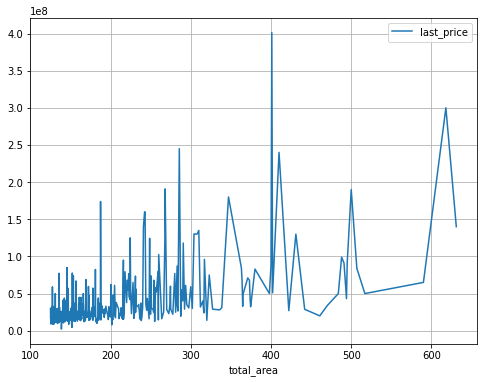

In [101]:
# График для общих площадей свыше 125м2
(data.query('total_area > 125')
     .pivot_table(index='total_area', values='last_price', aggfunc='median')
     .plot(y='last_price', figsize=(8, 6), grid=True))
plt.show()

In [102]:
data_area_big = (data.query('total_area > 125')
                        .pivot_table(index='total_area', values='last_price', aggfunc='median')
                         .reset_index())
print('Коэффициент корреляции:', round(data_area_big['total_area'].corr(data_area_big['last_price']),2))

Коэффициент корреляции: 0.54


In [103]:
data_area_huge = (data.query('total_area > 300')
                         .pivot_table(index='total_area', values='last_price', aggfunc='median')
                          .reset_index())
print('Коэффициент корреляции:', round(data_area_huge['total_area'].corr(data_area_huge['last_price']),2))

Коэффициент корреляции: 0.26


Вывод: 

Анализ показал, что имеется положительная зависимость стоимости объекта от общей площади. В диапазоне до 125 м2, где располагается основной объем общих площадей, зависимость высокая, коэффициент корреляции составил 0.83. С увеличением общей площади коэффициент корреляции снижается до 0.54 для общей площади свыше 125 м2, что соответствует границе между средней и умеренной зависимостью. Также отдельный интерес представляет зависимость стоимости от общей площади для люксовых квартир площадью свыше 300 м2, где коэффициент корреляции составил 0.26, что соответствует слабой зависимости. При этом это не означает, что зависимость действительно слабая, а значит имеются дополнительные факторы, которые оказывают влияние на стоимость, такие как локация квартиры, близость от центра, наличия парков, инфраструктуры и пр.

##### Изучение влияния жилой площади на общую (полную) стоимость объекта

Построим график зависимости стоимости объекта от жилой площади представленных квартир

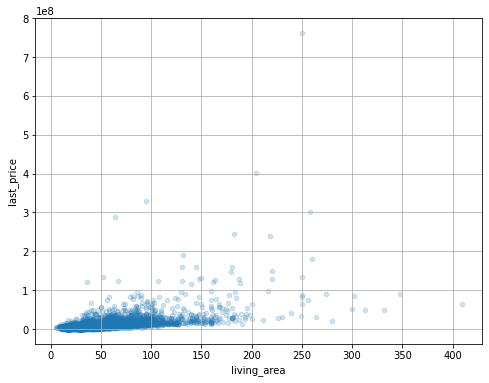

In [104]:
data.plot(x='living_area', y='last_price', kind='scatter', alpha=0.2, figsize=(8, 6), grid=True)
plt.show()


Видим, что с увеличением жилой площади разброс стоимости растет, при этом на небольших площадях уже прослеживается положительная зависимость стоимости от жилой площади объекта.

В связи с тем, что анализ зависимости стоимости для больших квартир, общей площадью свыше 125 м2, был уже подробно проведен в предыдущем разделе и учитывая, что общая площадь является наиболее важным параметром среди других видов площадей, оказывающих влияние на стоимость, сосредоточимся здесь на рассмотрении объектов, соответствующих основной массе квартир. 

Для возможности сравнения влияния, а заодно подтверждения гипотезы о том, что общая площадь является наиболее важным параметром среди других видов площадей, оказывающих влияние на стоимость, здесь и для анализа влияния площадей кухонь будем использовать выборку квартир из предыдущего раздела с общими площадями до 125 м2.

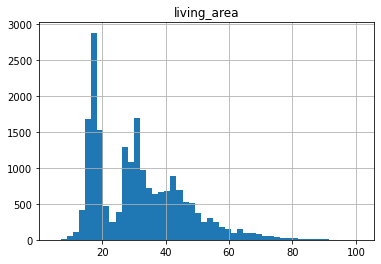

In [105]:
data.query('total_area <= 125').hist('living_area', bins=50)
plt.show()

Для уменьшения разброса стоимости объектов проведем анализ сгруппировав жилые площади с расчетом по этим группам медианных значений стоимости.

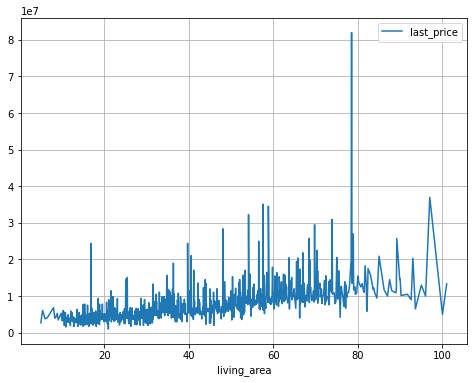

In [106]:
(data.query('total_area <= 125')
     .pivot_table(index='living_area', values='last_price', aggfunc='median')
     .plot(y='last_price', figsize=(8, 6), grid=True))
plt.show()

In [107]:
data_living_area = (data.query('total_area <= 125')
                         .pivot_table(index='living_area', values='last_price', aggfunc='median')
                            .reset_index())
print('Коэффициент корреляции:', round(data_living_area['living_area'].corr(data_living_area['last_price']),2))

Коэффициент корреляции: 0.65


Вывод: 

Анализ показал, что имеется положительная зависимость стоимости объекта от жилой площади, что подтверждается графически и на основе расчета коэффициента корреляции, который составил 0.65, что соответствует среднему уровню зависимости. Также отметим, что он оказался ниже коэффициента корреляции для общей площади 0.83 для той же выборки квартир.

##### Изучение влияния площади кухни на общую (полную) стоимость объекта

Построим график зависимости стоимости объекта от площади кухни представленных квартир

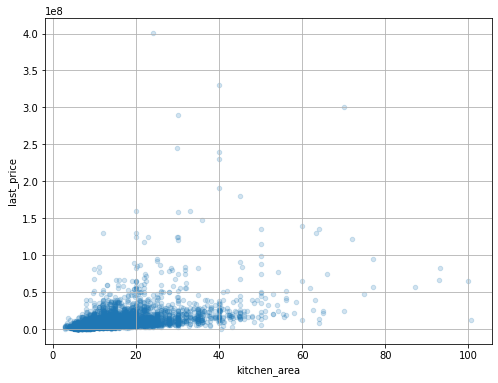

In [108]:
data.plot(x='kitchen_area', y='last_price', kind='scatter', alpha=0.2, figsize=(8, 6), grid=True)
plt.show()

Используем для анализа влияния площадей кухонь на стоимость выборку квартир из предыдущего раздела с общими площадями до 125 м2.

Для уменьшения разброса стоимости объектов проведем анализ сгруппировав площади кухонь с расчетом по этим группам медианных значений стоимости.

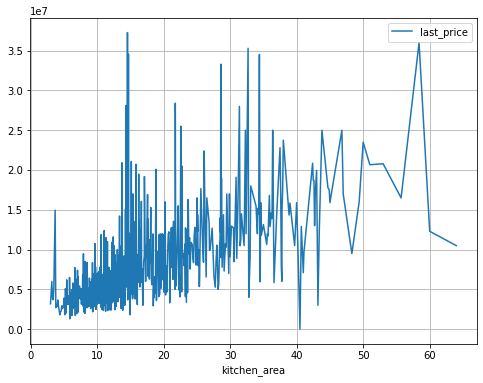

In [109]:
(data.query('total_area <= 125')
     .pivot_table(index='kitchen_area', values='last_price', aggfunc='median')
     .plot(y='last_price', figsize=(8, 6), grid=True))
plt.show()

In [110]:
data_kitchen_area = (data.query('total_area <= 125')
                         .pivot_table(index='kitchen_area', values='last_price', aggfunc='median')
                         .reset_index())
print('Коэффициент корреляции:', round(data_kitchen_area['kitchen_area'].corr(data_kitchen_area['last_price']),2))

Коэффициент корреляции: 0.65


Вывод: 

Анализ показал, что имеется положительная зависимость стоимости объекта от площади кухни, что подтверждается графически и на основе расчета коэффициента корреляции, который составил 0.65, что соответствует среднему уровню зависимости. Также отметим, что он оказался ниже коэффициента корреляции для общей площади 0.83 для той же выборки квартир.

##### Изучение влияния количества комнат на общую (полную) стоимость объекта

Рассмотрим данные с количеством комнат, видно, что по 192 объектам количство комнат равно 0, исключим их из анализа

In [111]:
data['rooms'].unique()

array([ 3,  1,  2,  4,  5,  6,  0,  7, 11,  8, 10, 15,  9, 19, 16, 14])

Для уменьшения разброса стоимости объектов проведем анализ сгруппировав квартиры с одинаковым количеством квартир и    расчетом по этим группам медианных значений стоимости. Также посчитаем коэффициент корреляции.

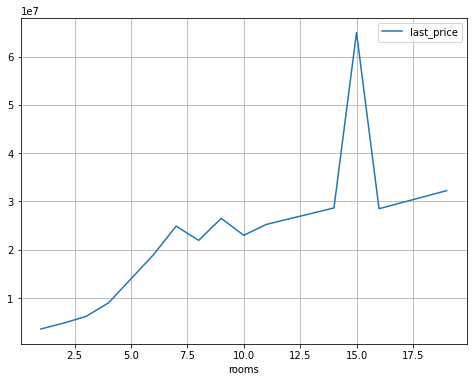

In [112]:
(data.query('rooms >= 1')
     .pivot_table(index='rooms', values='last_price', aggfunc='median')
     .plot(y='last_price', figsize=(8, 6), grid=True))
plt.show()

In [113]:
data_rooms = (data.query('rooms >= 1')
                         .pivot_table(index='rooms', values='last_price', aggfunc='median')
                         .reset_index())
print('Коэффициент корреляции:', round(data_rooms['rooms'].corr(data_rooms['last_price']),2))

Коэффициент корреляции: 0.79


Вывод: 

Анализ показал, что имеется положительная зависимость стоимости объекта от количества комнат в квартире, что подтверждается графически и на основе расчета коэффициента корреляции, который составил 0.79, что соответствует сильной степени зависимости.

##### Изучение влияния типа этажа, на котором расположена квартира, на общую (полную) стоимость объекта

Для уменьшения разброса стоимости объектов проведем анализ сгруппировав квартиры с типом этажа и    расчетом по этим группам медианных значений стоимости.

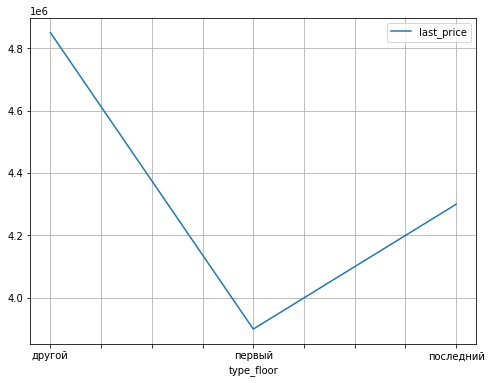

In [114]:
(data.pivot_table(index='type_floor', values='last_price', aggfunc='median')
     .plot(y='last_price', figsize=(8, 6), grid=True))
plt.show()

Вывод: 

Анализ показал, что имеется зависимость стоимости объекта от типа этажа, на котором находится квартира. Ожидаемо самые дорогие размещаются ни на первом, ни на последнем этаже, самые дешевые квартиры, оказались расположенные на первом этаже.

##### Изучение влияния даты размещения объявления на общую (полную) стоимость объекта

###### Изучение влияния дня недели размещения объявления на общую (полную) стоимость объекта

Для уменьшения разброса стоимости объектов проведем анализ сгруппировав квартиры с одинаковым днем недели размещения объявления и расчетом по этим группам медианных значений стоимости. Также посчитаем коэффициент корреляции.

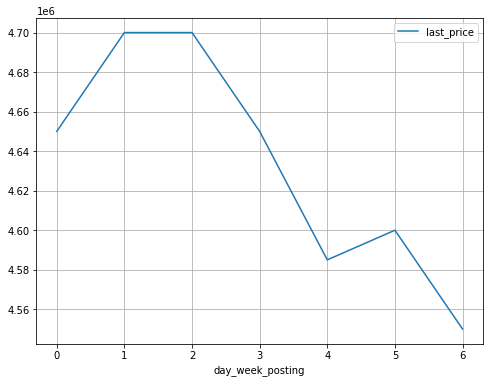

In [115]:
(data.pivot_table(index='day_week_posting', values='last_price', aggfunc='median')
     .plot(y='last_price', figsize=(8, 6), grid=True))
plt.show()

In [116]:
data_week_posting = (data.pivot_table(index='day_week_posting', values='last_price', aggfunc='median')
                         .reset_index())
print('Коэффициент корреляции:', round(data_week_posting['day_week_posting'].corr(data_week_posting['last_price']),2))

Коэффициент корреляции: -0.83


Вывод: 

Анализ показал, что имеется отрицательная зависимость стоимости объекта от дня недели размещения объявления в квартире, что подтверждается графически и на основе расчета коэффициента корреляции, который составил -0.83, что соответствует сильной степени зависимости. В начале неделе выкладываются самые дорогие (проданные по более высокой цене) объявления, цена снижается по мере движения к выходным. 

###### Изучение влияния месяца размещения объявления на общую (полную) стоимость объекта

Для уменьшения разброса стоимости объектов проведем анализ сгруппировав квартиры с одинаковым месяцем размещения объявления и расчетом по этим группам медианных значений стоимости. Также посчитаем коэффициент корреляции.

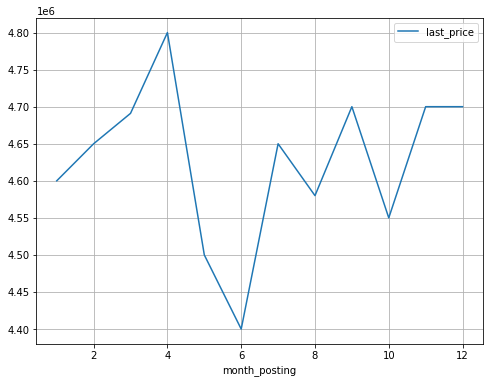

In [117]:
(data.pivot_table(index='month_posting', values='last_price', aggfunc='median')
     .plot(y='last_price', figsize=(8, 6), grid=True))
plt.show()

In [118]:
data_month_posting = (data.pivot_table(index='month_posting', values='last_price', aggfunc='median')
                         .reset_index())
print('Коэффициент корреляции:', round(data_month_posting['month_posting'].corr(data_month_posting['last_price']),2))

Коэффициент корреляции: 0.06


Вывод: 

Анализ показал, что в целом по году на основе коэффициента корреляции, который близок к 0, зависимость стоимости объекта от месяца размещения объявления практически отсутствует. На основе графического анализа можно осторожно предположить, что наиболее дорогие (проданные по более высокой цене) объявления выкладываются весной и осенью + декабрь, а наиболее дешевые в летние месяцы и в зимние после нового года. 

###### Изучение влияния года размещения объявления на общую (полную) стоимость объекта

Для уменьшения разброса стоимости объектов проведем анализ сгруппировав квартиры с одинаковым годом размещения объявления и расчетом по этим группам медианных значений стоимости. Также посчитаем коэффициент корреляции.

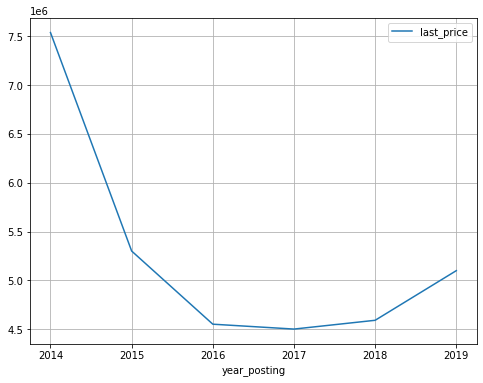

In [119]:
(data.pivot_table(index='year_posting', values='last_price', aggfunc='median')
     .plot(y='last_price', figsize=(8, 6), grid=True))
plt.show()

In [120]:
data_year_posting = (data.pivot_table(index='year_posting', values='last_price', aggfunc='median')
                         .reset_index())
print('Коэффициент корреляции:', round(data_year_posting['year_posting'].corr(data_year_posting['last_price']),2))

Коэффициент корреляции: -0.66


Вывод: 

Анализ показал, что в данном диапазоне годов с 2014 по 2019 в целом наблюдалась отрицательная зависимость стоимости объекта от года размещения объявления в квартире с разворотом в сторону увеличения стоимости с 2017 года. Коэффициент корреляции в целом на данном промежутке составил -0.66, но здесь более информативно графическое представление данных, отображающее направление и динамику изменения стоимости.

#### Расчет средней цены одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений 

Построим сводную таблицу с количеством объявлений и медианной ценой квадратного метра для 10 населённых пунктов с наибольшим числом объявлений.

In [121]:
data_many_advs = data.pivot_table(index='locality_name', values='price_1m2', aggfunc=['count', 'median'])
data_many_advs.columns = ['count_advertisement', 'median_price_1m2']
data_many_advs.sort_values(by='count_advertisement', ascending=False).head(10)

,count_advertisement,median_price_1m2
locality_name,,
Санкт-Петербург,15477,104615.380
Мурино,584,86250.375
Кудрово,470,95555.315
поселок Шушары,439,76829.270
Всеволожск,398,65789.470
Пушкин,368,99993.590
Колпино,332,74689.875
поселок Парголово,327,91642.860
Гатчина,307,67796.610


Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра.

In [122]:
data_many_advs = data_many_advs.sort_values(by='median_price_1m2', ascending=False).reset_index()
print('Населённый пункт с самой высокой стоимостью кв.м.:'\
      ,data_many_advs.loc[0, 'locality_name'],'-', \
      round(data_many_advs.loc[0, 'median_price_1m2']),'руб./кв.м.')
print('Населённый пункт с самой низкой стоимостью кв.м.:'\
      ,data_many_advs.loc[304, 'locality_name'],'-', \
      round(data_many_advs.loc[304, 'median_price_1m2']),'руб./кв.м.')

Населённый пункт с самой высокой стоимостью кв.м.: Кронштадт - 111471 руб./кв.м.
Населённый пункт с самой низкой стоимостью кв.м.: деревня Старополье - 11000 руб./кв.м.


#### Анализ изменения средней цены для каждого километра от центра Санкт - Петербурга

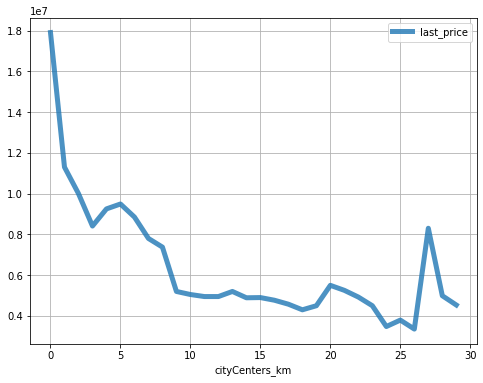

In [123]:
(data.query('locality_name == "Санкт-Петербург"')
     .pivot_table(index='cityCenters_km', values='last_price', aggfunc='median')
     .plot(y='last_price', figsize=(8, 6), linewidth=5, alpha=0.8, grid=True))
plt.show()

In [124]:
data_SP = (data.query('locality_name == "Санкт-Петербург"')
            .pivot_table(index='cityCenters_km', values='last_price', aggfunc='median')
           .reset_index())
print('Коэффициент корреляции:', round(data_SP['cityCenters_km'].corr(data_SP['last_price']),2))

Коэффициент корреляции: -0.71


Вывод: Из графика изменения медианной цены для каждого километра от центра Санкт - Петербурга видно, что с увеличением расстояния от центра медианная цена заметно падает в пределах 7 км от центра, что можно описать, как условный центр города и далее более плавно снижается по мере удаления от него. Коэффициент корреляции составил: -0.71, что соответствует сильной степени зависимости исследуемых параметров. Резкий скачок, наблюдаемый в радиусе 27 км от центра обусловлен малым количеством выборки в этом диапазоне - 2 значения стоимости и высокая цена по одному из объектов - 14.3 млн руб.

### Общий вывод

**В рамках проекта  была проведена:** предобработка данных, расширение датасета требуемой информацией для целей дальнейшего анализа, проведен исследовательский анализ данных, изучение и определение параметров, влияющих на цену объектов. 

**На этапе предобработки данных:** рукодствовались принципом максимального сохранения исходных данных, а именно: замена пропусков там, где было возможно подобрать логическую замену, в противном случае, сохранение их. 

Произведено необходимое изменение типов данных, проверка явных дубликатов, обработка неявных дубликатов в названиях населенных пунктов. 

**На этапе исследовательского анализа данных:** более глубоко исследованы  данные, предложенные к анлизу, в том числе с использованием графических инструментов. 

При поиске аномальных данных часть параметров, такие как жилая площадь, площадь кухонь, были проанализированы в парах с общей площадью, понимая, что их соотношения имеют определенную взаимозависимость. 

Там, где это представлялось возможным,  заменили аномальные, редкие значения или исключили данные, где сложно было подобрать логическую замену. 

При исключении каких-либо данных, по прежнему, руководствовались принципом их максимального сохранения, так, например, при анализе общей площади квартир были сохранены малочисленные данные по площадям свыше 200-300 м2, как представляющие интерес для исследования в рамках отдельной "люксовой" группы. По той же причине были сохранены соответствующие данные для жилой и площади кухни. Остальные данные "очищены" достаточно.

**На этапе изучения различных факторов/параметров, влияющих на цену объектов:** 
- изучили скорость продажи квартир. Определили, что обычно продажа занимает около 100 дней, бОльшая часть продаж (75%) приходится на период до 230 дней. Продажи до трех месяцев можно считать быстрыми (лучше, чем в "среднем"), продажи свыше 500 дней (выходят за границы "нормальных" значений) можно классифицировать как долгие.
- изучили влияние различных видов площадей объекта на его стоимость, анализ показал, что во всех случаях имеется положительная зависимость, наибольшую степень влияния на стоимость объекта оказывает общая площадь. В диапазоне до 125 м2, где располагается основной объем общих площадей, коэффициент корреляции составил 0.83. С увеличением общей площади коэффициент корреляции снижается до 0.26 для люксовых квартир площадью свыше 300 м2. При этом отметим, что это не означает, что зависимость для таких квартир действительно слабая, значит имеются дополнительные факторы, которые оказывают влияние на стоимость, такие как локация квартиры, близость от центра, наличия парков, инфраструктуры и пр. 
- определили сильную положительную зависимость стоимости объекта от количества комнат в квартире, коэффициент корреляции составил 0.79.
- определили зависимость стоимости объекта от типа этажа, на котором находится квартира. Самые дорогие размещаются ни на первым, ни на последнем этаже, самые дешевые квартиры, оказались расположенные на первом этаже. Более низкая ценя на квартиры на первом и последнем этажах обусловлена более худшими условиями - шум от улиц и моторов лифта, охлаждаемость помещения зимой.
- анализ показал, что в начале неделе выкладываются самые дорогие (проданные по более высокой цене) объявления, цена снижается по мере движения к выходным. Анализируя зависимость стоимости объекта от месяца размещения объявления можно осторожно предположить, что наиболее дорогие (проданные по более высокой цене) объявления выкладываются весной и осенью + декабрь, а наиболее дешевые в летние месяцы и в зимние после нового года. С 2014 по 2019 в целом наблюдалась отрицательная зависимость стоимости объекта от года размещения объявления в квартире с разворотом в сторону увеличения стоимости с 2017 года. 
- исследование изменения медианной цены объекта для каждого километра от центра Санкт - Петербурга показало, что с увеличением расстояния от центра медианная цена заметно падает в пределах 7 км от центра города, что можно описать, как условный центр города и далее более плавно снижается по мере удаления от него. Коэффициент корреляции составил: -0.71, что соответствует сильной степени зависимости исследуемых параметров.

Таким образом, можно констатировать, что основными из изученных параметров, наиболее сильно влияющих на стоимость объекта, являются:
- общая площадь
- количество комнат 
- расстояние до центра города

На эти параметры, необходимо в первую очередь обращать внимание при анализе стоимости объекта. Учет дополнительно остальных вышеописанных параметров даст более полную и достоверную картину при анализе и прогнозировании рыночной стоимости объекта.